In [2]:
import pandas as pd



In [3]:
data = pd.read_csv('data/processed/nnapartment_more_info_nn_only.csv')
data

,rooms,area1,area2,area3,district,floor,total_floors,building_type,year,additional_info,price
0,2.0,44.0,30.0,6.0,Автозаводский район,4,4,кирпич,1961.0,хрущ.,4900000
1,2.0,32.0,18.1,6.8,Советский район,1,3,кирпич,1958.0,стал.,4000000
2,2.0,45.0,31.2,6.0,Канавинский район,2,5,кирпич,1972.0,хрущ.,4300000
3,1.0,30.8,18.1,5.8,Канавинский район,2,5,кирпич,1965.0,хрущ.,4200000
4,2.0,48.0,26.0,9.0,Московский район,5,10,панель,2016.0,undefind,7150000
...,...,...,...,...,...,...,...,...,...,...,...
316,1.0,29.9,18.0,6.1,Автозаводский район,2,2,шлакоблок,1948.0,народн. стр.,2999000
317,1.0,44.5,21.4,9.8,Нижегородский район,4,17,блок+утеплитель,2008.0,undefind,7450000
318,1.0,31.5,17.8,5.9,Ленинский район,3,5,кирпич,1962.0,хрущ.,4500000
319,1.0,30.9,18.7,5.5,Московский район,1,5,панель,1969.0,брежн.,3620000


In [4]:
data.head()

,rooms,area1,area2,area3,district,floor,total_floors,building_type,year,additional_info,price
0,2.0,44.0,30.0,6.0,Автозаводский район,4,4,кирпич,1961.0,хрущ.,4900000
1,2.0,32.0,18.1,6.8,Советский район,1,3,кирпич,1958.0,стал.,4000000
2,2.0,45.0,31.2,6.0,Канавинский район,2,5,кирпич,1972.0,хрущ.,4300000
3,1.0,30.8,18.1,5.8,Канавинский район,2,5,кирпич,1965.0,хрущ.,4200000
4,2.0,48.0,26.0,9.0,Московский район,5,10,панель,2016.0,undefind,7150000


In [5]:
cols = ['rooms', 'area1', 'area3', 'district', 'floor', 'total_floors',
       'building_type', 'year', 'price']

In [6]:
data=data[cols].copy()

In [19]:
data.year.min()

1917.0

In [7]:
data.rooms.value_counts()

2.0    114
1.0    114
3.0     70
0.8     14
4.0      9
Name: rooms, dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 321 entries, 0 to 320
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   rooms          321 non-null    float64
 1   area1          321 non-null    float64
 2   area3          321 non-null    float64
 3   district       321 non-null    object 
 4   floor          321 non-null    int64  
 5   total_floors   321 non-null    int64  
 6   building_type  321 non-null    object 
 7   year           321 non-null    float64
 8   price          321 non-null    int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 22.7+ KB


In [9]:
#data['rooms_count'] = data.rooms.astype('float')

In [10]:
#data.head()

In [11]:
(data.floor != 1)&(data.floor != data.total_floors)

0      False
1      False
2       True
3       True
4       True
       ...  
316    False
317     True
318     True
319    False
320     True
Length: 321, dtype: bool

In [12]:
data['no_first_no_last'] = (data.floor != 1)&(data.floor != data.total_floors)

In [13]:
data.head()

,rooms,area1,area3,district,floor,total_floors,building_type,year,price,no_first_no_last
0,2.0,44.0,6.0,Автозаводский район,4,4,кирпич,1961.0,4900000,False
1,2.0,32.0,6.8,Советский район,1,3,кирпич,1958.0,4000000,False
2,2.0,45.0,6.0,Канавинский район,2,5,кирпич,1972.0,4300000,True
3,1.0,30.8,5.8,Канавинский район,2,5,кирпич,1965.0,4200000,True
4,2.0,48.0,9.0,Московский район,5,10,панель,2016.0,7150000,True


<Axes: >

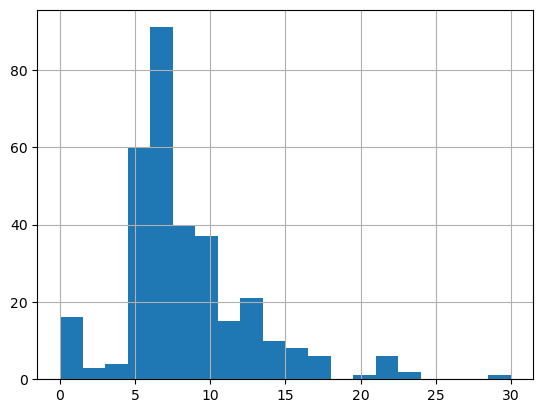

In [14]:
data.area3.hist(bins=20)

In [15]:
from sklearn.preprocessing import KBinsDiscretizer

est = KBinsDiscretizer(
    n_bins=5, encode='ordinal', strategy='uniform', subsample=None
)
est.fit(data.area3.values.reshape(-1, 1))
Xt = est.transform(data.area3.values.reshape(-1, 1))
Xt[:5]

array([[1.],
       [1.],
       [1.],
       [0.],
       [1.]])

In [17]:
data['area3_bins'] = est.transform(data.area3.values.reshape(-1, 1))
data.head(25)

,rooms,area1,area3,district,floor,total_floors,building_type,year,price,no_first_no_last,area3_bins
0,2.0,44.0,6.0,Автозаводский район,4,4,кирпич,1961.0,4900000,False,1.0
1,2.0,32.0,6.8,Советский район,1,3,кирпич,1958.0,4000000,False,1.0
2,2.0,45.0,6.0,Канавинский район,2,5,кирпич,1972.0,4300000,True,1.0
3,1.0,30.8,5.8,Канавинский район,2,5,кирпич,1965.0,4200000,True,0.0
4,2.0,48.0,9.0,Московский район,5,10,панель,2016.0,7150000,True,1.0
5,0.8,12.7,1.0,Автозаводский район,1,9,панель,1978.0,2315000,False,0.0
6,1.0,27.6,2.5,дер. Анкудиновка,9,23,панель,2021.0,4330000,True,0.0
7,2.0,44.8,6.0,Нижегородский район,1,5,кирпич,1971.0,6500000,False,1.0
8,3.0,59.1,5.6,Автозаводский район,5,5,панель,1963.0,6150000,False,0.0
9,2.0,39.4,4.5,Сормовский район,2,2,шлакоблок,1959.0,3099000,False,0.0


<Axes: >

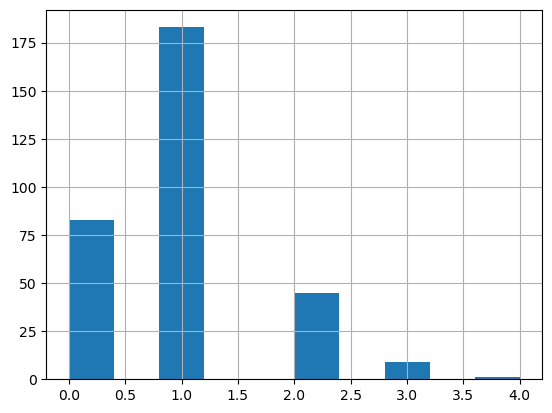

In [25]:
data.area3_bins.hist()

In [26]:
data = data.drop(['area3','floor','total_floors'], axis=1)
data

,rooms,area1,district,building_type,year,price,no_first_no_last,area3_bins
0,2.0,44.0,Автозаводский район,кирпич,1961.0,4900000,False,1.0
1,2.0,32.0,Советский район,кирпич,1958.0,4000000,False,1.0
2,2.0,45.0,Канавинский район,кирпич,1972.0,4300000,True,1.0
3,1.0,30.8,Канавинский район,кирпич,1965.0,4200000,True,0.0
4,2.0,48.0,Московский район,панель,2016.0,7150000,True,1.0
...,...,...,...,...,...,...,...,...
316,1.0,29.9,Автозаводский район,шлакоблок,1948.0,2999000,False,1.0
317,1.0,44.5,Нижегородский район,блок+утеплитель,2008.0,7450000,True,1.0
318,1.0,31.5,Ленинский район,кирпич,1962.0,4500000,True,0.0
319,1.0,30.9,Московский район,панель,1969.0,3620000,False,0.0


In [45]:
#data.district.unique()

array(['Автозаводский район', 'Советский район', 'Канавинский район',
       'Московский район', 'Приокский район', 'дер. Анкудиновка',
       'Нижегородский район', 'Сормовский район', 'Ленинский район',
       'г. Кстово', 'пос. Ждановский', 'Новинский сельсовет',
       'г. Балахна', 'г. Бор', 'г. Арзамас', 'г. Дзержинск',
       'г. Богородск', 'рп. Ковернино', 'дер. Афонино', 'пос. Дружный',
       'пос. Буревестник', 'г. Городец', 'г. Княгинино'], dtype=object)

In [46]:
#dist = [x for x in data.district.unique() if 'район' in x]
#dist

['Автозаводский район',
 'Советский район',
 'Канавинский район',
 'Московский район',
 'Приокский район',
 'Нижегородский район',
 'Сормовский район',
 'Ленинский район']

In [52]:
#data.loc[~data.district.isin(dist), 'district'] = 'Другой'
#data.head(15)

,area1,district,building_type,year,price,rooms_count,no_first_no_last,area3_bins
1,44.0,Автозаводский район,кирпич,1961.0,4900000,2.0,False,1.0
2,32.0,Советский район,кирпич,1958.0,4000000,2.0,False,1.0
3,45.0,Канавинский район,кирпич,1972.0,4300000,2.0,True,1.0
4,30.8,Канавинский район,кирпич,1965.0,4200000,1.0,True,1.0
5,48.0,Московский район,панель,2016.0,7150000,2.0,True,1.0
6,28.0,Приокский район,кирпич,1959.0,2900000,1.0,False,1.0
7,12.7,Автозаводский район,панель,1978.0,2315000,0.8,False,0.0
8,27.6,Другой,панель,2021.0,4330000,1.0,True,0.0
9,44.8,Нижегородский район,кирпич,1971.0,6500000,2.0,False,1.0
10,59.1,Автозаводский район,панель,1963.0,6150000,3.0,False,1.0


In [28]:
data.to_csv('data/processed/nnapartment_more_info_new_features.csv', index = False)

**Задание**  

Использовать полученный набор данных для обучения pipeline состоящего из этапов, трансформации данных, конструиррвания признаков, выбора признаков (понижения размерности).

завести аккаунт на github повторить тему окружения (inviroment) (venv)